<a href="https://colab.research.google.com/github/Shahilasulthana/DeepLearning/blob/main/L1_L2_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mnist-dataset' dataset.
Path to dataset files: /kaggle/input/mnist-dataset


In [2]:
import os
import numpy as np

dataset_path = "/kaggle/input/mnist-dataset"


In [3]:
def resolve_file(path):
    if os.path.isdir(path):
        return os.path.join(path, os.listdir(path)[0])
    return path

def load_mnist_images(file_path):
    file_path = resolve_file(file_path)
    with open(file_path, 'rb') as f:
        f.read(16)
        data = np.frombuffer(f.read(), dtype=np.uint8)
    return data.reshape(-1, 28, 28)

def load_mnist_labels(file_path):
    file_path = resolve_file(file_path)
    with open(file_path, 'rb') as f:
        f.read(8)
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels


In [4]:
x_train = load_mnist_images(os.path.join(dataset_path, "train-images-idx3-ubyte"))
y_train = load_mnist_labels(os.path.join(dataset_path, "train-labels-idx1-ubyte"))

x_test = load_mnist_images(os.path.join(dataset_path, "t10k-images-idx3-ubyte"))
y_test = load_mnist_labels(os.path.join(dataset_path, "t10k-labels-idx1-ubyte"))


In [5]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

l2_model = models.Sequential([
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(784,)),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

l2_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history_l2 = l2_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8084 - loss: 0.9374 - val_accuracy: 0.9456 - val_loss: 0.3659
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9454 - loss: 0.3510 - val_accuracy: 0.9582 - val_loss: 0.2974
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9587 - loss: 0.2810 - val_accuracy: 0.9624 - val_loss: 0.2566
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9653 - loss: 0.2443 - val_accuracy: 0.9661 - val_loss: 0.2368
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9706 - loss: 0.2188 - val_accuracy: 0.9697 - val_loss: 0.2174
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9737 - loss: 0.1990 - val_accuracy: 0.9694 - val_loss: 0.2091
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9755 - loss: 0.1882 - val_accuracy: 0.9746 - val_loss: 0.1916
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9787 - loss: 0.1757 - val_accuracy: 0.

In [8]:
l1_model = models.Sequential([
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l1(0.001),
                 input_shape=(784,)),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(10, activation='softmax')
])

l1_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
history_l1 = l1_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7944 - loss: 3.0269 - val_accuracy: 0.9013 - val_loss: 1.0243
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9077 - loss: 0.9506 - val_accuracy: 0.9187 - val_loss: 0.7684
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9179 - loss: 0.7420 - val_accuracy: 0.9301 - val_loss: 0.6306
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9275 - loss: 0.6214 - val_accuracy: 0.9338 - val_loss: 0.5598
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9305 - loss: 0.5544 - val_accuracy: 0.9378 - val_loss: 0.5064
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9359 - loss: 0.5021 - val_accuracy: 0.9427 - val_loss: 0.4674
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9352 - loss: 0.4793 - val_accuracy: 0.9435 - val_loss: 0.4509
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9386 - loss: 0.4576 - val_accuracy: 0.

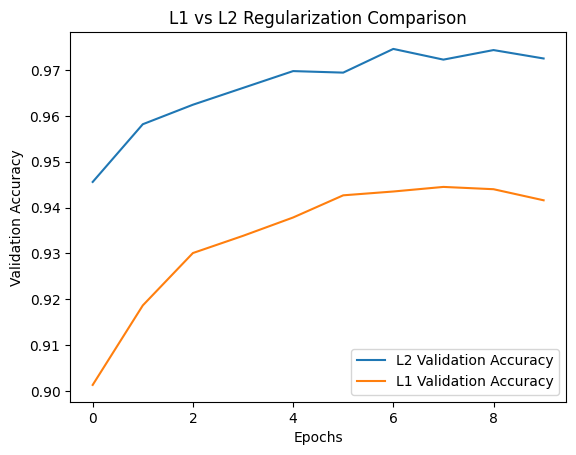

In [10]:
import matplotlib.pyplot as plt

plt.plot(history_l2.history['val_accuracy'], label='L2 Validation Accuracy')
plt.plot(history_l1.history['val_accuracy'], label='L1 Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("L1 vs L2 Regularization Comparison")
plt.legend()
plt.show()


In [11]:
l2_loss, l2_acc = l2_model.evaluate(x_test, y_test, verbose=0)
l1_loss, l1_acc = l1_model.evaluate(x_test, y_test, verbose=0)

print("L2 Test Accuracy:", l2_acc)
print("L1 Test Accuracy:", l1_acc)


L2 Test Accuracy: 0.9736999869346619
L1 Test Accuracy: 0.9434000253677368
